# LSTM

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


465/465 ━━━━━━━━━━━━━━━━━━━━ 135s 280ms/step - accuracy: 0.6046 - loss: 1.1142 - val_accuracy: 0.6841 - val_loss: 0.7390
Epoch 2/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 131s 281ms/step - accuracy: 0.6681 - loss: 0.7686 - val_accuracy: 0.6634 - val_loss: 0.8092
Epoch 3/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 144s 286ms/step - accuracy: 0.6499 - loss: 0.8130 - val_accuracy: 0.6680 - val_loss: 0.7538
Epoch 4/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 139s 280ms/step - accuracy: 0.6368 - loss: 0.8657 - val_accuracy: 0.6605 - val_loss: 0.7481
Epoch 5/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 130s 280ms/step - accuracy: 0.6949 - loss: 0.6574 - val_accuracy: 0.6922 - val_loss: 0.6711
Epoch 6/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 141s 278ms/step - accuracy: 0.7132 - loss: 0.6056 - val_accuracy: 0.6933 - val_loss: 0.6697
Epoch 7/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 147s 289ms/step - accuracy: 0.7304 - loss: 0.5676 - val_accuracy: 0.7081 - val_loss: 0.6606
Epoch 8/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 131s 282ms/step - accuracy: 0.7483 - loss: 0.54

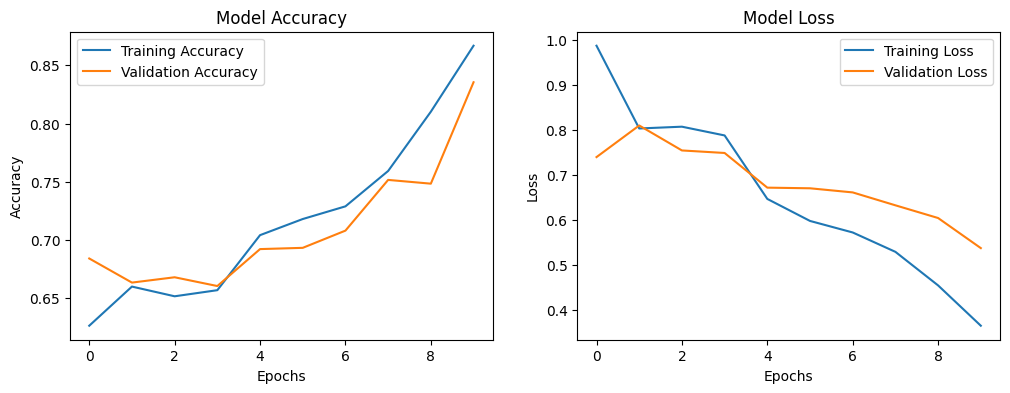

117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.8307 - loss: 0.5510
Test Accuracy: 83.55%
117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step
Classification Report:
               precision    recall  f1-score   support

     anxiety       0.81      0.68      0.74       403
     bipolar       0.60      0.59      0.60       397
  depression       0.56      0.77      0.65       387
      normal       0.96      0.96      0.96      2137
        ptsd       0.76      0.61      0.68       396

    accuracy                           0.84      3720
   macro avg       0.74      0.72      0.73      3720
weighted avg       0.84      0.84      0.84      3720



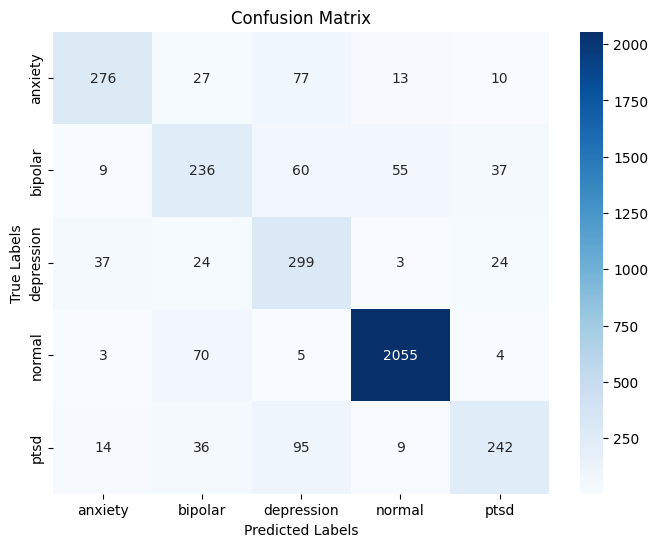

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('preprocessed_mental_health.csv')

# Separate features and target
X = data['text']
y = data['mental_health_issue']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)  # Convert labels to one-hot encoded format for multi-class classification

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad the text sequences
vocab_size = 10000  # Set a vocabulary size
max_length = 100    # Set a max length for padding

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Build the LSTM model
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(y.shape[1], activation='softmax')  # Output layer with softmax for multi-class classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Generate predictions and convert back from one-hot encoding
y_pred = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Output classification report
print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))

# Plot Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step


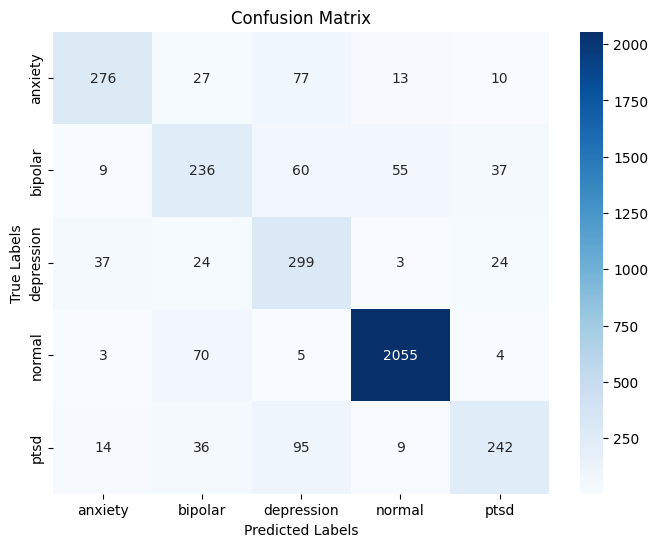

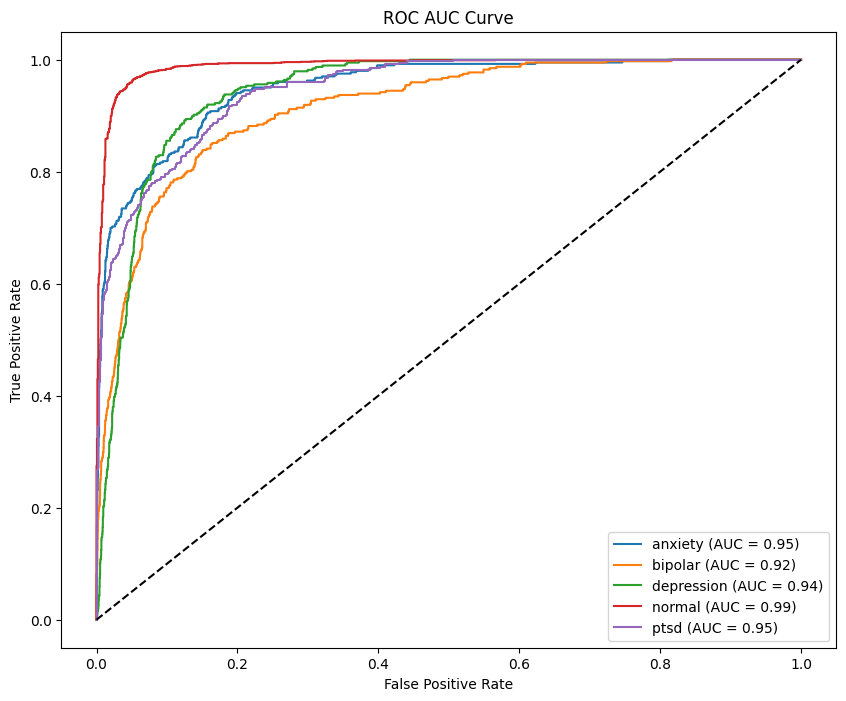

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, class_labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# ROC AUC Curve
def plot_roc_auc(y_true, y_pred_proba, class_labels):
    # Binarize the true labels for multi-class ROC AUC
    y_true_bin = label_binarize(y_true, classes=range(len(class_labels)))

    plt.figure(figsize=(10, 8))
    for i, label in enumerate(class_labels):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random performance
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Predict probabilities and classes
y_pred_proba = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred_proba, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Plot the confusion matrix
plot_confusion_matrix(y_true_classes, y_pred_classes, label_encoder.classes_)

# Plot the ROC AUC curves
plot_roc_auc(y_true_classes, y_pred_proba, label_encoder.classes_)


In [3]:
import pickle

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# Save the label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# Save the trained model in HDF5 format for Keras models (not .pkl, but the typical format for Keras models)
model.save('lstm_model.h5')

print("Tokenizer, label encoder, and model have been saved successfully.")


Tokenizer, label encoder, and model have been saved successfully.


In [4]:
!jupyter nbconvert --to html 08_LSTM.ipynb

[NbConvertApp] Converting notebook 08_LSTM.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 556532 bytes to 08_LSTM.html
